In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import torch
import seaborn as sns


df =pd. read_csv("/Users/Mac/Downloads/articles.csv",encoding = 'ISO 8859-1')

df.head(5)


,Id,Heading,Article.Banner.Image,Outlets,Article.Description,Full_Article,Article_Type,Tonality
0,d6995462-5e87-453b-b64d-e9f1df6e94d2,"A Puzzling Maneuver, Then Freefall: NTSB Repor...",NaN,Essex Caller,<p>The helicopter that crashed in Southeast Al...,<p>The helicopter that crashed in Southeast Al...,Commercial,Negative
1,8b05e939-a89e-4548-b92b-013822e8ee7d,Bells Nexus Air Taxi Concept Rings Changes Fo...,NaN,Aviation Week Network,<p>A year after teasing the fledgling electric...,<p>A year after teasing the fledgling electric...,Commercial,Positive
2,69fcd400-bceb-4255-8277-619f2d68ac0b,Bell Helicopter Show Air Taxi Nexus,http://images.tmtpost.com/uploads/images/2019/...,TMTPost,<p>Bell released the full-size design of the v...,<p>Bell released the full-size design of the v...,Commercial,Positive
3,17943578-c11b-414b-b3f5-063d3a93157b,BELL DÉVOILE LA CONCEPTION INTÉGRALE DE SON TA...,http://www.fredzone.org/wp-content/uploads/201...,Fredzone,<p>Bell est une soci&eacute;t&eacute; am&eacut...,<p>Bell est une soci&eacute;t&eacute; am&eacut...,Commercial,Positive
4,f33c7b11-5f77-4a98-bb2e-d36689042aea,Les premiers retours dOlivier Ezratty,NaN,FrenchWeb,<p>It was still anecdotal to observe the explo...,<p>It was still anecdotal to observe the explo...,Commercial,Positive


In [15]:
df =df.fillna(" Unpredicted")
df.head(5)

,Id,Heading,Article.Banner.Image,Outlets,Article.Description,Full_Article,Article_Type,Tonality
0,d6995462-5e87-453b-b64d-e9f1df6e94d2,"A Puzzling Maneuver, Then Freefall: NTSB Repor...",Unpredicted,Essex Caller,<p>The helicopter that crashed in Southeast Al...,<p>The helicopter that crashed in Southeast Al...,Commercial,Negative
1,8b05e939-a89e-4548-b92b-013822e8ee7d,Bells Nexus Air Taxi Concept Rings Changes Fo...,Unpredicted,Aviation Week Network,<p>A year after teasing the fledgling electric...,<p>A year after teasing the fledgling electric...,Commercial,Positive
2,69fcd400-bceb-4255-8277-619f2d68ac0b,Bell Helicopter Show Air Taxi Nexus,http://images.tmtpost.com/uploads/images/2019/...,TMTPost,<p>Bell released the full-size design of the v...,<p>Bell released the full-size design of the v...,Commercial,Positive
3,17943578-c11b-414b-b3f5-063d3a93157b,BELL DÉVOILE LA CONCEPTION INTÉGRALE DE SON TA...,http://www.fredzone.org/wp-content/uploads/201...,Fredzone,<p>Bell est une soci&eacute;t&eacute; am&eacut...,<p>Bell est une soci&eacute;t&eacute; am&eacut...,Commercial,Positive
4,f33c7b11-5f77-4a98-bb2e-d36689042aea,Les premiers retours dOlivier Ezratty,Unpredicted,FrenchWeb,<p>It was still anecdotal to observe the explo...,<p>It was still anecdotal to observe the explo...,Commercial,Positive


In [16]:
# df = df.dropna(subset=["Tonality"])
# df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    4305 non-null   object
 1   Heading               4305 non-null   object
 2   Article.Banner.Image  4305 non-null   object
 3   Outlets               4305 non-null   object
 4   Article.Description   4305 non-null   object
 5   Full_Article          4305 non-null   object
 6   Article_Type          4305 non-null   object
 7   Tonality              4305 non-null   object
dtypes: object(8)
memory usage: 269.2+ KB


/Users/Mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


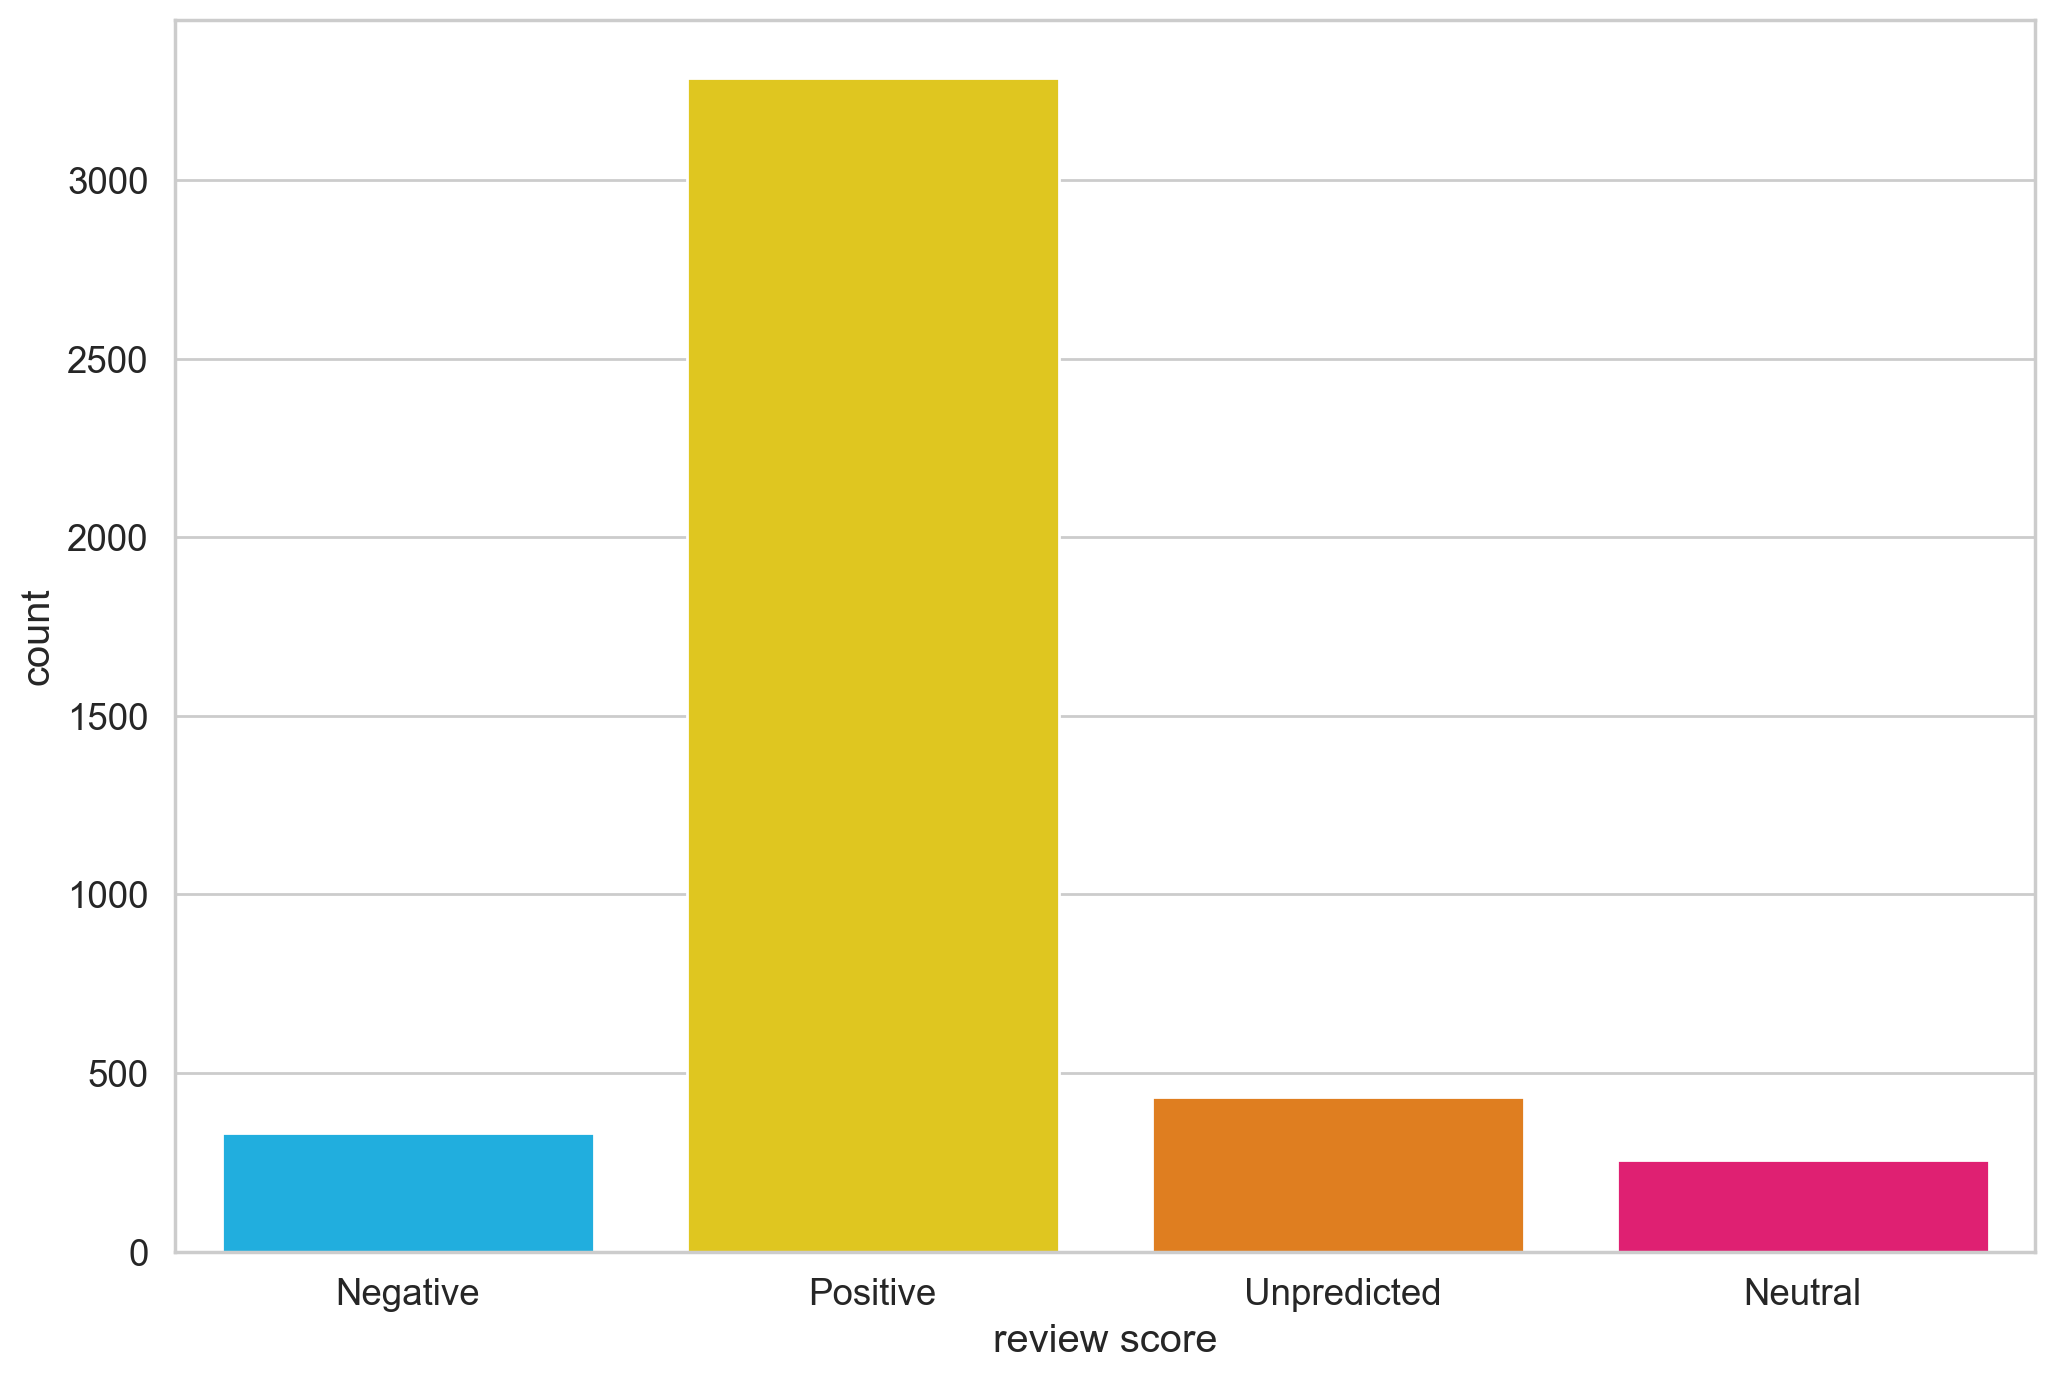

In [17]:
df.shape
df.info()
sns.countplot(df.Tonality)
plt.xlabel('review score');
     

In [18]:
PRE_TRAINED_MODEL_NAME = '/Users/Mac/Downloads/vocab.txt'


In [19]:
from bs4 import BeautifulSoup
import re
def clean_data(data):
    data = BeautifulSoup(data, "lxml").get_text()
    # Delete the @
    data = re.sub(r"@[A-Za-z0-9]+", ' ', data)
    # Delete URL links
    data = re.sub(r"https?://[A-Za-z0-9./]+", ' ', data)
    # Just keep letters and important punctuation
    data = re.sub(r"[^a-zA-Z.!?']", ' ', data)
    # Remove additional spaces
    data = re.sub(r" +", ' ', data)
    return data

df_clean = [clean_data(data) for data in df.Full_Article]
# df_clean

In [20]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)


/Users/Mac/opt/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1703: FutureWarning: Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  warnings.warn(


In [21]:
for i in df_clean:
    tokens = tokenizer.tokenize(i)
    token_ids = tokenizer.convert_tokens_to_ids(tokens)

#     print(f' Sentence: {i}')
#     print(f'   Tokens: {tokens}')
#     print(f'Token IDs: {token_ids}')
    tokenizer.sep_token, tokenizer.sep_token_id
    tokenizer.cls_token, tokenizer.cls_token_id
    tokenizer.pad_token, tokenizer.pad_token_id
    tokenizer.unk_token, tokenizer.unk_token_id
    encoding = tokenizer.encode_plus(i,
    max_length=32,
    add_special_tokens=True, # Add '[CLS]' and '[SEP]'
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt',)  # Return PyTorch tensors

    encoding.keys()
#     print(len(encoding['input_ids'][0]))
    encoding['input_ids'][0]
    encoding['attention_mask']
    tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])
     

     





Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/Users/Mac/opt/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [22]:
token_lens = []

for txt in df_clean:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))
# print(token_lens)

/Users/Mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


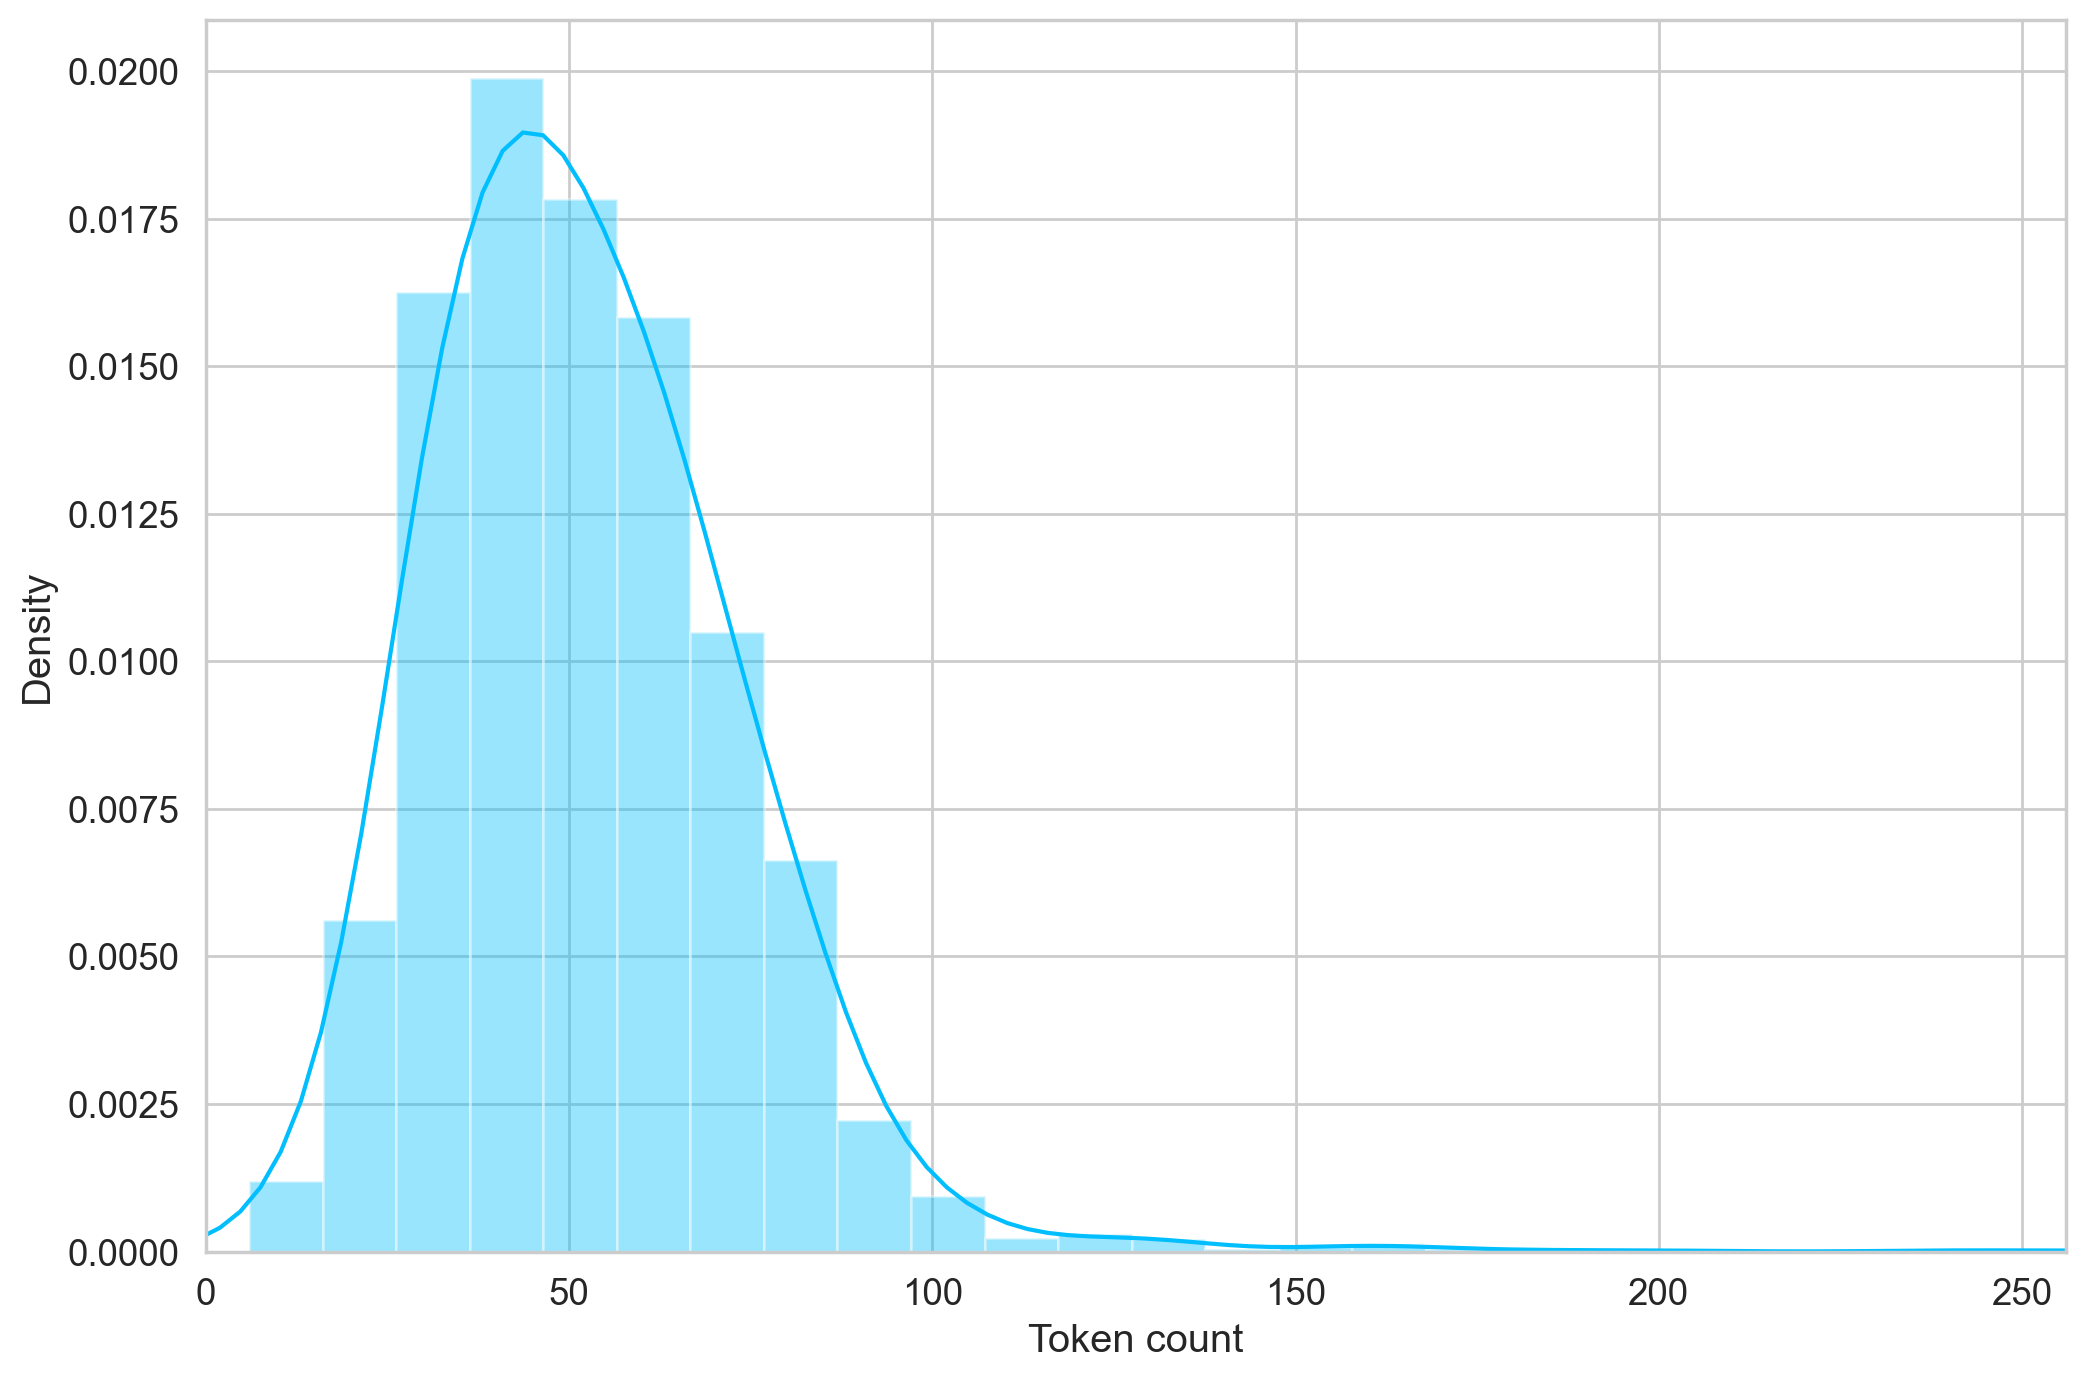

In [23]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

In [24]:
MAX_LEN = 160


In [25]:
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

class GPReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }
     

In [26]:
#####
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
###

df_train, df_test = train_test_split(df, test_size=0.1, random_state = RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state = RANDOM_SEED)
df_train.shape, df_val.shape, df_test.shape


((3874, 8), (215, 8), (216, 8))

In [27]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(reviews=df.Full_Article.to_numpy(),
                       targets=df.Tonality.to_numpy(),tokenizer=tokenizer,max_len=max_len)
  return DataLoader(ds,batch_size=batch_size,num_workers=4)


In [28]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
data = next(iter(train_data_loader))
data.keys()


Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/Mac/opt/anaconda3/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/Users/Mac/opt/anaconda3/lib/python3.9/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
AttributeError: Can't get attribute 'GPReviewDataset' on <module '__main__' (built-in)>
